## Kiến thức về Matplotlib trong Python

### Giới thiệu về Figure

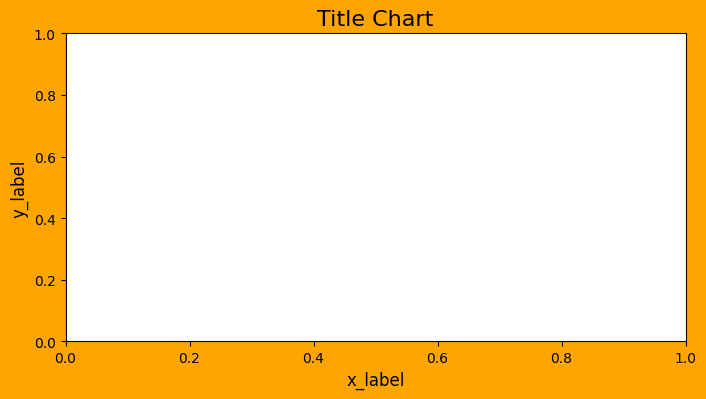

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), facecolor='orange')
plt.title('Title Chart', fontsize=16)
plt.xlabel('x_label', fontsize=12)
plt.ylabel('y_label', fontsize=12)

plt.show()

### Cách vẽ nhiều biểu đồ trong 1 figure

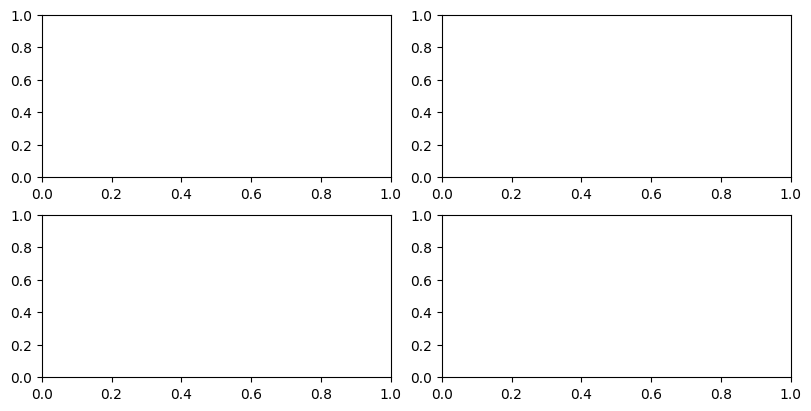

In [2]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(2, 2, figsize=(8, 4), layout='constrained')

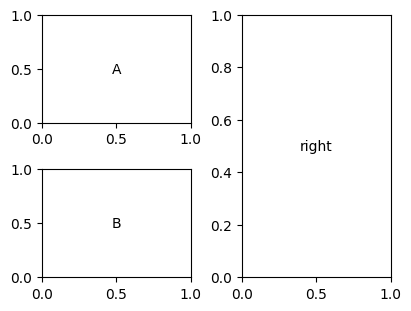

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplot_mosaic([['A', 'right'], ['B', 'right']], figsize=(4, 3), layout='constrained')
for ax_name, ax in ax.items():
	ax.text(0.5, 0.5, ax_name, ha='center', va='center')

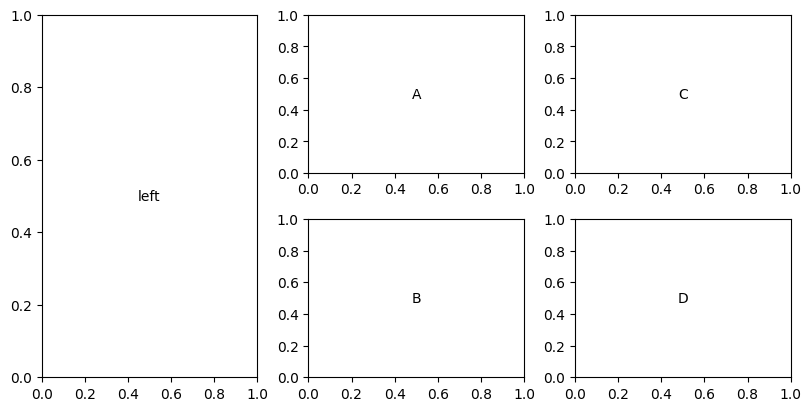

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplot_mosaic([['left', 'A', 'C'], ['left', 'B', 'D']], figsize=(8, 4), layout='constrained')
for ax_name, ax in ax.items():
	ax.text(0.5, 0.5, ax_name, ha='center', va='center')

### Các biểu đồ cơ bản, và nâng cao trong Matplotlib

In [5]:
# import dataset
import pandas as pd

df = pd.read_csv('Sample_Superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# in tên columns
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

---
### Biểu đồ đường - line chart

### Vẽ biểu đồ line thể hiện số lượng sản phẩm được bán theo từng ngày

In [7]:
# số lượng sản phẩm bán theo từng ngày
df_daily_quantity = df.groupby(['Order Date']).agg({
	'Sales': 'sum',
	'Quantity': 'sum',
	'Profit': 'sum'
})
df_daily_quantity.head()

,Sales,Quantity,Profit
Order Date,,,
01/01/2017,1481.828,56,-181.4109
01/02/2015,1932.096,29,-1161.5484
01/02/2016,405.920,5,105.5410
01/02/2017,2079.554,26,-207.0473
01/03/2014,16.448,2,5.5512


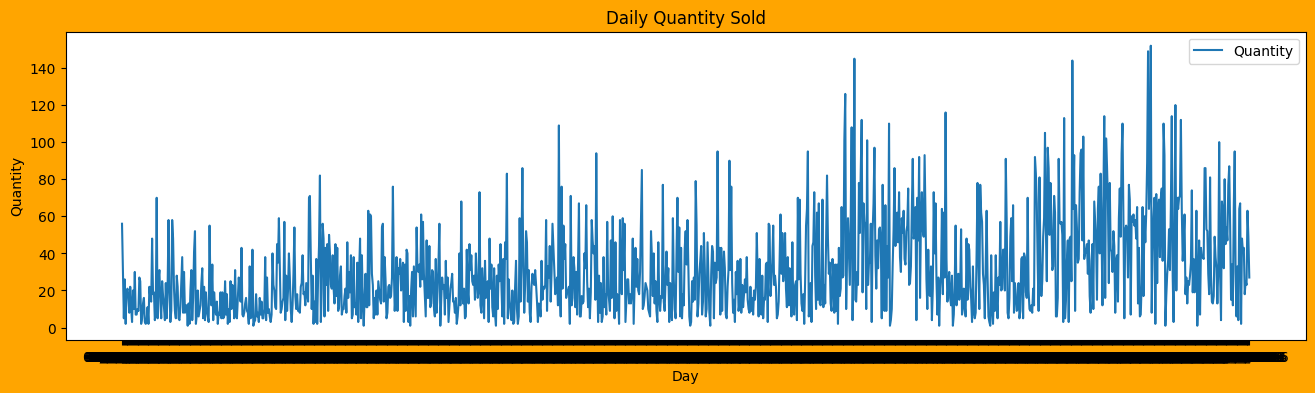

In [8]:
# vẽ biểu đồ line số lượng sản phẩm bán theo ngày
import matplotlib.pyplot as plt

x = list(df_daily_quantity.index)
y = df_daily_quantity['Quantity'].values

plt.figure(figsize=(16, 4), facecolor='orange')
plt.title('Daily Quantity Sold')
plt.plot(x, y, label='Quantity')
plt.ylabel('Quantity')
plt.xlabel('Day')
plt.legend()

plt.show()

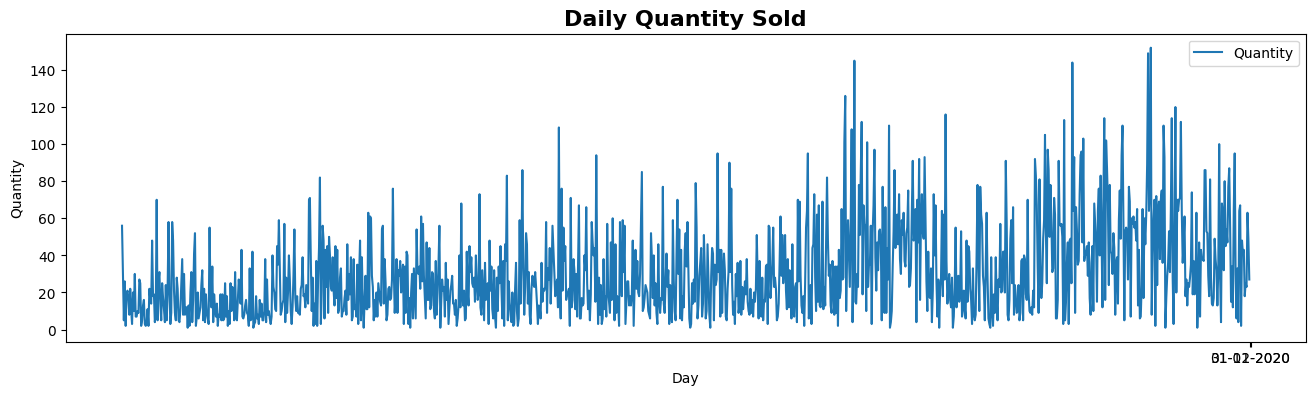

In [9]:
# vẽ theo cách 2
import matplotlib.pyplot as plt

x = list(df_daily_quantity.index)
y = df_daily_quantity['Quantity'].values

fig, ax = plt.subplots(figsize=(16, 4))
ax.set_title('Daily Quantity Sold', fontsize=16, fontweight='black')
ax.set_xlabel('Day')
ax.set_ylabel('Quantity')
ax.plot(x, y, label='Quantity')
ax.legend()
ax.set_xticks(['01-01-2020', '31-12-2020'])

plt.show()

### Ví dụ: Vẽ biểu đồ line thể hiện số lượng sản phẩm được bán theo tháng của năm 2017

In [10]:
# chuẩn hóa dữ liệu cột Order Date
df['Order Month'] = pd.to_datetime(df['Order Date'])
df['OD_Month'] = df['Order Month'].dt.month
df['OD_Year'] = df['Order Month'].dt.year

In [11]:
# lọc dữ liệu bán hàng năm 2017
# df_current_year = df.loc[df['OD_Year'] == df['OD_Year'].max()]
df_current_year = df[df['OD_Year'].isin([df['OD_Year'].max()])]
df_current_year.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,OD_Month,OD_Year
12,13,CA-2017-114412,04/15/2017,04/20/2017,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2017-04-15,4,2017
23,24,US-2017-156909,07/16/2017,07/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2017-07-16,7,2017
34,35,CA-2017-107727,10/19/2017,10/23/2017,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,2017-10-19,10,2017
41,42,CA-2017-120999,09/10/2017,09/15/2017,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,2017-09-10,9,2017
43,44,CA-2017-139619,09/19/2017,09/23/2017,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,2017-09-19,9,2017


In [12]:
# df_current_year['OD_Month'].unique()
# df_current_year['OD_Year'].unique()

In [13]:
# Group by bảng dữ liệu bán hàng theo tháng của năm 2017
df_sales_curent = df_current_year.groupby(['OD_Month']).agg({
	'Sales': 'sum',
	'Quantity': 'sum',
	'Profit': 'sum'
})
df_sales_curent

,Sales,Quantity,Profit
OD_Month,,,
1,43971.3740,597,7140.4391
2,20301.1334,363,1613.8720
3,58872.3528,885,14751.8915
4,36521.5361,733,933.2900
5,44261.1102,887,6342.5828
6,52981.7257,931,8223.3357
7,45264.4160,840,6952.6212
8,63120.8880,884,9040.9557
9,87866.6520,1660,10991.5556


In [14]:
# gắn giá trị cho x và y
x = list(df_sales_curent.index)
y = df_sales_curent['Quantity'].values


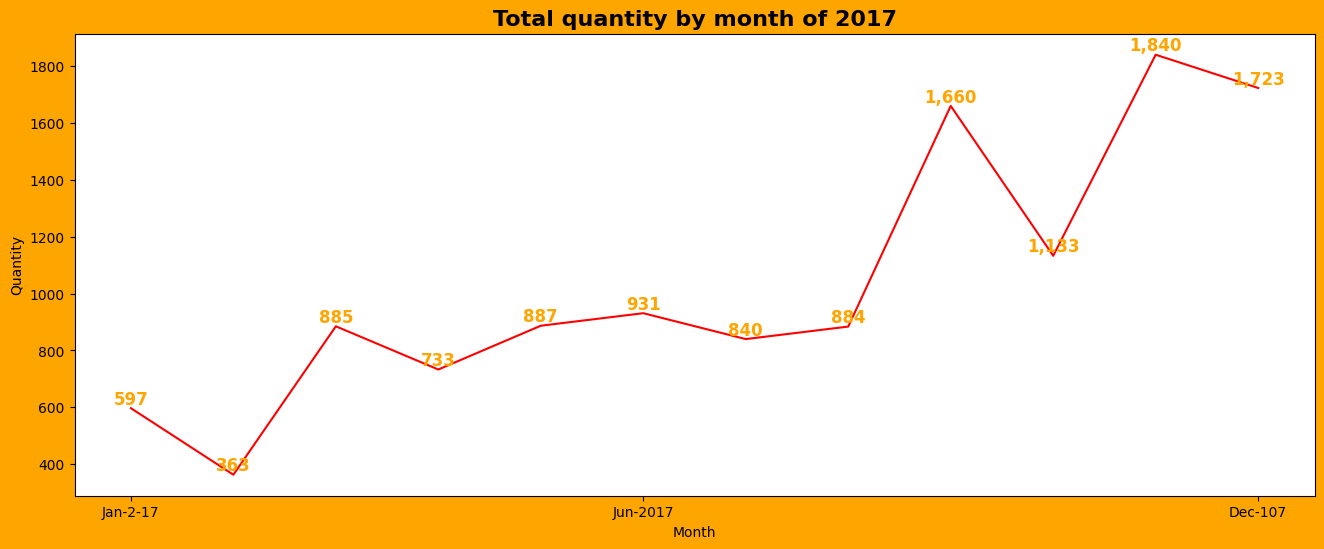

In [15]:
# vẽ biểu đồ line thể hiên số lượng sản phẩm đã bán từng tháng của năm 2017
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6), facecolor='orange')
ax.set_title('Total quantity by month of 2017', fontsize=16, fontweight='black')
ax.set_ylabel('Quantity')
ax.set_xlabel('Month')
ax.set_xticks([1, 6, 12], ['Jan-2-17', 'Jun-2017', 'Dec-107'])
ax.plot(x, y, color='red')

for index, values in zip(x, y):
	new_values = '{:,.0f}'.format(values)
	plt.text(index, values, str(new_values), fontsize=12, color='orange', fontweight='black', ha='center', va='bottom' )

plt.show()

### Ví dụ vẽ biểu đồ line chart của số lượng và doanh thu

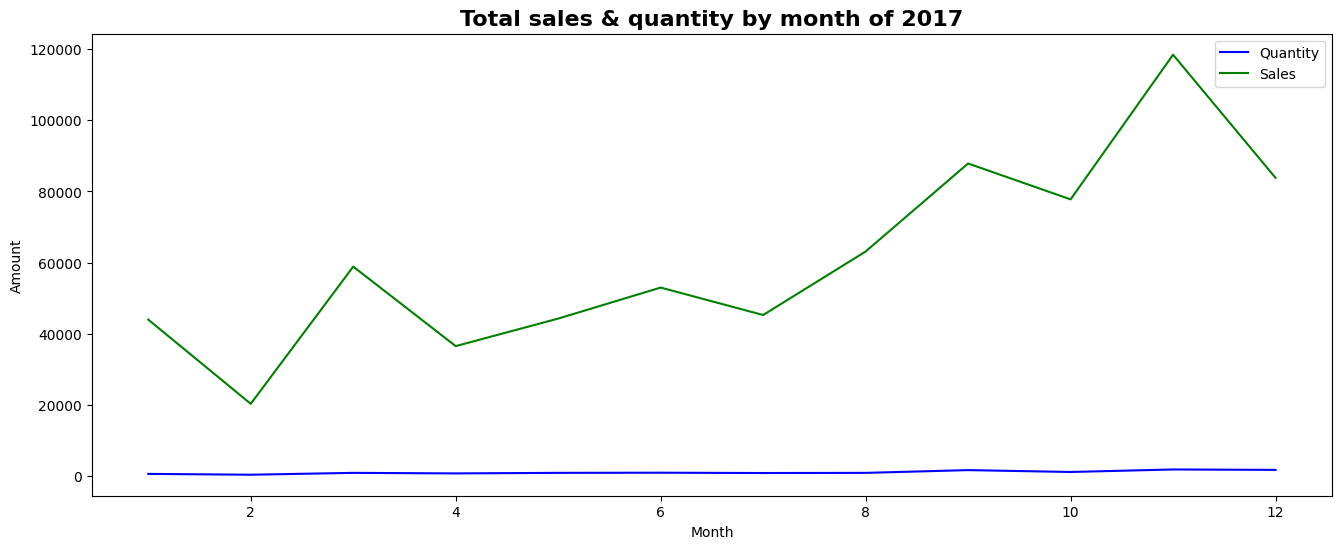

In [16]:
# vẽ biểu đồ line chart của số lượng và doanh thu
import matplotlib.pyplot as plt

x = list(df_sales_curent.index)
y1 = df_sales_curent['Quantity'].values
y2 = df_sales_curent['Sales'].values

plt.figure(figsize=(16, 6))
plt.plot(x, y1, markersize=5, label='Quantity', color='blue')
plt.plot(x, y2, markersize=5, label='Sales', color='green')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Total sales & quantity by month of 2017', fontsize=16, fontweight='black')
plt.legend()

plt.show()

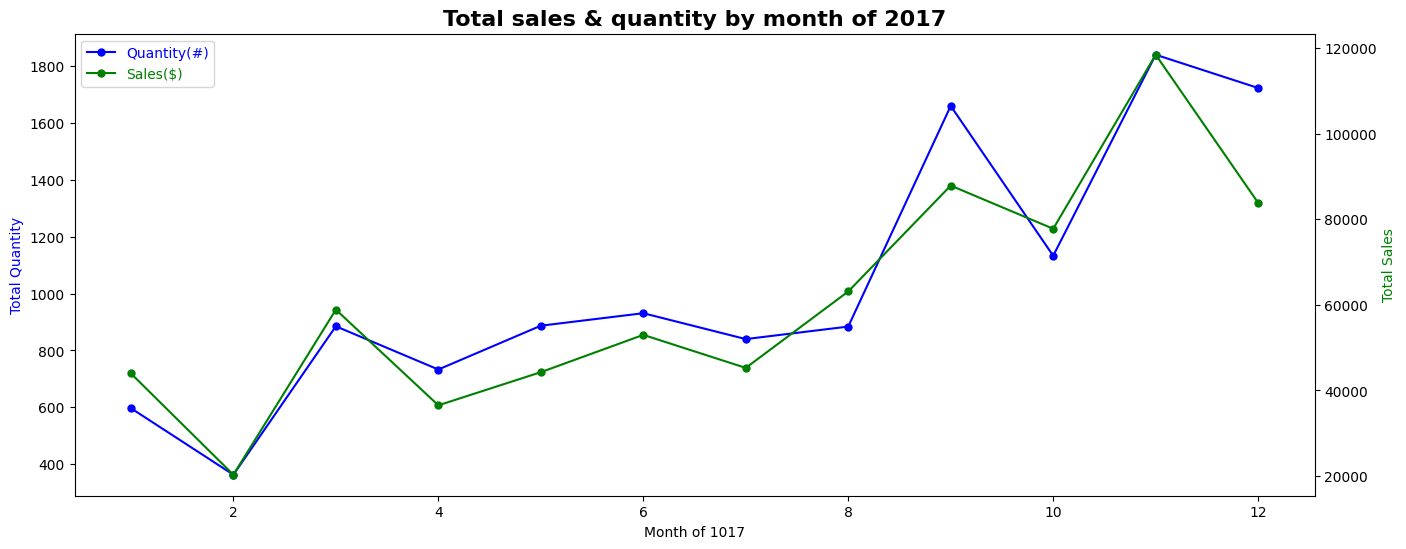

In [17]:
# vẽ biểu đồ có 2 trục y
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

x = list(df_sales_curent.index)
y1 = df_sales_curent['Quantity'].values
y2 = df_sales_curent['Sales'].values

dict_values = {
	'Quantity': df_sales_curent['Quantity'].values,
	'Sales':  df_sales_curent['Sales'].values
}
plt.figure(figsize = (16, 6))
host = host_subplot(111)
par = host.twinx()
#Set title của trục x, y
host.set_xlabel('Month of 1017')
host.set_ylabel('Total Quantity', color='blue')
par.set_ylabel('Total Sales', color='green')

#set chart
p1 = host.plot(x, y1, label='Quantity(#)', color='blue', markersize=5, marker='o')
p2 = par.plot(x, y2, label='Sales($)', color='green', markersize=5, marker='o')

plt.title('Total sales & quantity by month of 2017', fontsize=16, fontweight='black')
plt.legend(labelcolor='linecolor')
plt.show()

---
### Barchart

#### Ví dụ về doanh thu của từng nhóm khách hàng (segment)

In [18]:
import pandas as pd 
df = pd.read_csv('Sample_Superstore.csv')

df_sales = df.groupby(['Segment']).agg({
	'Customer ID': 'nunique',
	'Sales': 'sum',
	'Quantity': 'sum',
	'Profit': 'sum'
})
df_sales

,Customer ID,Sales,Quantity,Profit
Segment,,,,
Consumer,409,1.161401e+06,19521,134119.2092
Corporate,236,7.061464e+05,11608,91979.1340
Home Office,148,4.296531e+05,6744,60298.6785


In [19]:
x = list(df_sales.index)
y = df_sales['Sales'].values
z = df_sales['Quantity'].values
i = df_sales['Profit'].values
i

array([134119.2092,  91979.134 ,  60298.6785])

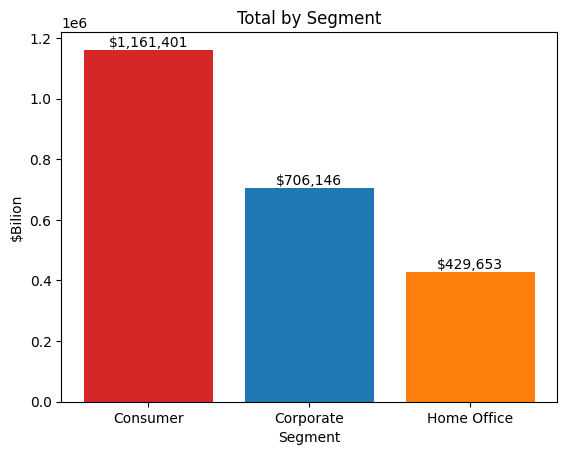

In [20]:
# import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = list(df_sales.index)
y = df_sales['Sales'].values
z = df_sales['Quantity'].values
i = df_sales['Profit'].values

bar_color = ['tab:red', 'tab:blue', 'tab:orange']

bar_container = ax.bar(x, y, color = bar_color)
ax.set_ylabel('$Bilion')
ax.set_xlabel('Segment')
ax.set_title('Total by Segment' )
ax.bar_label(bar_container, fmt='${:,.0f}')

plt.show()
